# Missing values- Feature Engineering

### why are these missing values?
1.They hesitate to put down the information
2.Survey informations are not that valid
3.Men--salary
4.Women--age
5.People may have died--NaN
### What are the different types of Missing data?
Missing completely at random,MCAR: A variable is missing completely at random
(MCAR) if the probability of being missing is the same for all the observations.
When data is MCAR, there is absolutely no relationship between the data missing
and any other values, observed or missing, withing the dataset.In other words,
those missing data points are a random subset of the data.There is nothing 
Systematic going on that makes some data more likely to be missing than other.
    

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('titanic_train.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### Missing Data Not At Random(MNAR):
Systematic missing values there is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset

In [7]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

In [8]:
np.round(df['cabin_null'].mean(),2)

0.77

In [9]:
df.columns#cabin_null is added to the dataset

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [10]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

## Missing at Random(MAR)

Men--hide their salary
Women--hide their age

All the techniques of handling missing values
1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

### Mean/Median/Mode Imputation
When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NaN with the most frequent occurence of the variables

In [11]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])

In [12]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [13]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [14]:
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)

In [15]:
median=df.Age.median()
median

28.0

In [16]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [17]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

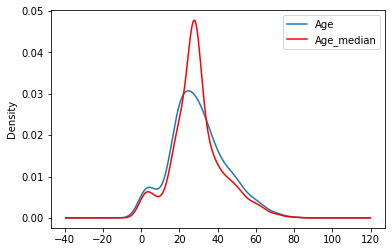

In [22]:
fig=plt.figure()
ax=fig.add_subplot()
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

## Advantages and Disadvantages of Mean/Median Imputation
## Advantages
1.Easy to implement(Robust to outliers)
2.Faster way to obtain the complete dataset
## Disadvantages
1.change or Distortion in the original variance
2.Impacts correlation

## Random Sample Imputation
Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When we should use it?
It assumes that the data are missing completely at random(MCAR)

In [5]:
import pandas as pd
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])

In [2]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df.isnull().mean() # it is used to get the percentage of null values

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [14]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+'_random']=df[variable]
    # It will have the random sample to fill nan values
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    # pandas need to have same index in order to merge the dataset 
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [6]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)
#

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [7]:
df['Age'].dropna().sample()#it gives different values for every

370    25.0
Name: Age, dtype: float64

In [9]:
median=df.Age.median()

In [10]:
median

28.0

In [15]:
impute_nan(df,"Age",median)

In [16]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

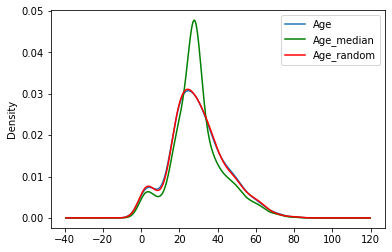

In [26]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='green')
df.Age_random.plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

### Advantages
1.Easy to implement
2.There is less distortion in variance
### Disadvantages
1.In every situation randomness won't work

## Capturing NaN values with a new feature

It works well if the data are not missing completely at random i.e., the null values has relationship with other values

In [30]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])

In [31]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [33]:
import numpy as np
df['Age_NaN']=np.where(df['Age'].isnull(),1,0)

In [35]:
df.head(50)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [37]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [39]:
df.head(50)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


## Advantages
1.Easy to implement
2.Captures the importance of missing values

## Diadvantages
1.creating Additional Feature(Leads to curse of dimensionality)

## End of Distribution Imputation

If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable

In [6]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

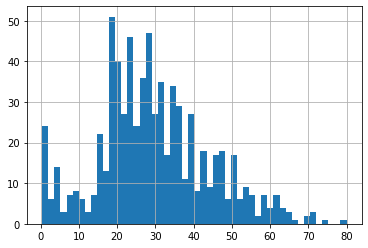

In [7]:
df['Age'].hist(bins=50)

In [10]:
extreme=df.Age.mean()+3*df.Age.std()# it is  the 3standard deviations in a
#normal distribution and adding mean with it
extreme
# we have taken extreme for right side of normal distribution 

73.27860964406095

C:\Users\wwwka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

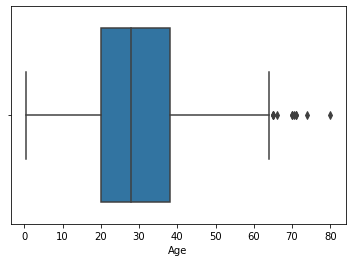

In [9]:
import seaborn as sns
sns.boxplot('Age',data=df)# It is used to find the outliers of the age feature

In [11]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [12]:
median=df['Age'].median()

In [13]:
median

28.0

In [14]:
impute_nan(df,'Age',median,extreme)

In [16]:
df.head(50)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:>

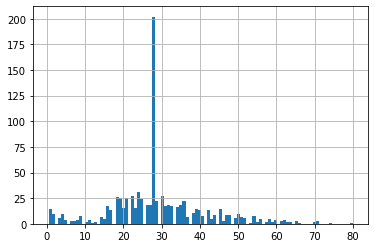

In [18]:
df['Age'].hist(bins=100)

<AxesSubplot:>

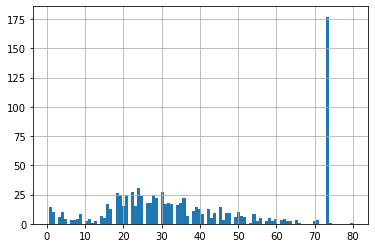

In [20]:
df['Age_end_distribution'].hist(bins=100)

<AxesSubplot:xlabel='Age_end_distribution'>

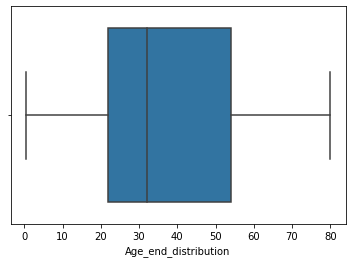

In [22]:
sns.boxplot('Age_end_distribution',data=df)
#Here we can see that there are no outliers are present in this column
#because of putting the extreme value in it

## Advantages
1.Easy to implement
2.captures the importance of missingness if there is one
## Disadvanatages
1.Distorts the original distribution of the variable
2.If missingness is not important, it may mask the predictive power of the   original variable by distorting its distribution
3.If the number of NA is big, it will mask true outliers in the distribution
4.If the number of NA is small, the replaced NA may be considered an outlier and pre-processed in a subsequent of feature engineering